# 단어 문서 행렬(Term Document Matrix)
- 문서별로 단어의 빈도를 정리한 행렬
- 비정형 데이터인 텍스트를 행렬 형태로 정형화
- BOW(Bag of Words)
    - 문서가 가지는 모든 단어(Words)를 문맥이나 순서를 무시하고 일괄적으로 단어에 대해 빈도 값을 부여해 피처 값을 추출하는 방법


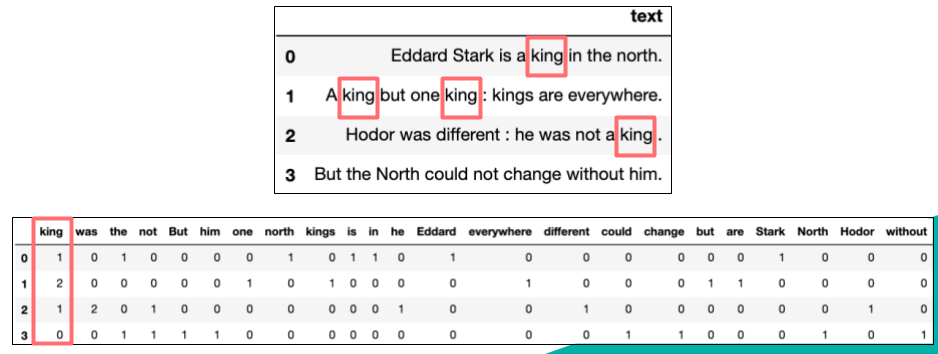

In [1]:
# 구글 코랩에서
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import torch
from tqdm.auto import tqdm
import random
import os

def reset_seeds(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

In [4]:
# 현재 작업 디렉토리 확인
os.getcwd()

'd:\\NLP_Papers_Review\\NLP_codes'

In [5]:
os.chdir('d:\\NLP_Papers_Review\\data')
os.getcwd()

'd:\\NLP_Papers_Review\\data'

In [6]:

DATA_PATH = os.getcwd()
SEED = 42

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

- imdb_dataset
    - 영화 리뷰 데이터셋
    - 영화 리뷰에 대해 긍정/부정을 예측하는 데이터셋

In [14]:
df = pd.read_csv(os.path.join(DATA_PATH, 'imdb_dataset.csv'))
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


- 긍정:1, 부정:0

In [16]:
df["sentiment"] = (df["sentiment"] == "positive").astype(int)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [17]:

df["sentiment"].value_counts(normalize=True)


1    0.5
0    0.5
Name: sentiment, dtype: float64

- 정답데이터

In [18]:
target = df["sentiment"].to_numpy().reshape(-1,1)
target.shape

(50000, 1)

In [19]:
target.mean()

0.5

## CountVectorizer
- max_features
    - 빈도순으로 문서별로 몇개의 단어의 빈도를 추출할건지
- stop_words
    - 제외 하고자 하는 불용어 리스트를 전달

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer(max_features=100, stop_words="english")
tdm = cnt_vec.fit_transform(df["review"])
tdm

<50000x100 sparse matrix of type '<class 'numpy.int64'>'
	with 835323 stored elements in Compressed Sparse Row format>

In [22]:
tdm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
cnt_vec.get_feature_names_out() # TDM 에 컬럼명

array(['10', 'acting', 'action', 'actors', 'actually', 'away', 'bad',
       'best', 'better', 'big', 'bit', 'br', 'cast', 'character',
       'characters', 'come', 'comedy', 'did', 'didn', 'director', 'does',
       'doesn', 'don', 'end', 'fact', 'family', 'far', 'feel', 'film',
       'films', 'fun', 'funny', 'gets', 'girl', 'going', 'good', 'got',
       'great', 'guy', 'horror', 'interesting', 'isn', 'just', 'kind',
       'know', 'life', 'like', 'little', 'll', 'long', 'look', 'lot',
       'love', 'make', 'makes', 'making', 'man', 'minutes', 'movie',
       'movies', 'music', 'new', 'old', 'original', 'people',
       'performance', 'plot', 'point', 'pretty', 'probably', 'quite',
       'real', 'really', 'right', 'role', 'saw', 'say', 'scene', 'scenes',
       'script', 'seen', 'series', 'story', 'thing', 'things', 'think',
       'thought', 'time', 'times', 'tv', 've', 'want', 'watch',
       'watching', 'way', 'woman', 'work', 'world', 'years', 'young'],
      dtype=object)

- 문서별로 단어(토큰) 분리 기준을 지정할 수 있다.

In [24]:
cnt_vec = CountVectorizer(max_features=100, tokenizer= lambda x : x.split(",") , token_pattern=None)
cnt_vec.fit(df["review"])
cnt_vec.get_feature_names_out()

array(['', ' acting', ' action', ' after all', ' again', ' and',
       ' and of course', ' and yes', ' apparently', ' as always',
       ' as usual', ' at least', ' at times', ' bad', ' bad acting',
       ' because', ' boring', ' but', ' but hey', ' but then again',
       ' by the way', ' cinematography', ' comedy', ' costumes',
       ' directing', ' direction', ' director', ' drama', ' drugs',
       ' dull', ' editing', ' etc', ' etc.', ' etc.)', ' for example',
       ' for instance', ' for me', ' for the most part', ' funny',
       ' however', ' i guess', ' i mean', ' i think', ' i thought',
       ' in fact', ' in my opinion', ' in particular', ' in the end',
       ' indeed', ' jr.', ' like me', ' love', ' maybe', ' music',
       ' naturally', ' no', ' of course', ' oh', ' on the other hand',
       ' or', ' perhaps', ' please', ' really', ' romance', ' sad',
       ' sadly', ' say', ' script', ' sex', ' sexy', ' so', ' sure',
       ' suspense', ' that is', ' the acting', 

In [25]:
cnt_vec = CountVectorizer(max_features=100, stop_words="english")
tmp = cnt_vec.fit_transform(df["review"])
tmp

<50000x100 sparse matrix of type '<class 'numpy.int64'>'
	with 835323 stored elements in Compressed Sparse Row format>

In [26]:
tdm_df = pd.DataFrame( tmp.toarray(), columns=cnt_vec.get_feature_names_out() )
tdm_df

,10,acting,action,actors,actually,away,bad,best,better,big,...,ve,want,watch,watching,way,woman,work,world,years,young
0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,0,0,1,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,1,0,1,...,0,0,1,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
49996,0,1,0,0,0,0,4,0,2,0,...,0,1,2,0,0,0,0,0,0,0
49997,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
tdm_df.sum().sort_values()

woman      5341
fun        5392
girl       5495
away       5509
kind       5548
          ...  
just      35184
like      40172
film      79705
movie     87971
br       201951
Length: 100, dtype: int64

In [28]:
tdm_df.sum().to_dict()

{'10': 8614,
 'acting': 12867,
 'action': 6497,
 'actors': 8951,
 'actually': 8470,
 'away': 5509,
 'bad': 18473,
 'best': 12612,
 'better': 11430,
 'big': 6962,
 'bit': 5967,
 'br': 201951,
 'cast': 7426,
 'character': 13905,
 'characters': 14456,
 'come': 6290,
 'comedy': 6576,
 'did': 12624,
 'didn': 8768,
 'director': 8812,
 'does': 11627,
 'doesn': 8876,
 'don': 17623,
 'end': 11121,
 'fact': 6902,
 'family': 5884,
 'far': 5994,
 'feel': 5835,
 'film': 79705,
 'films': 13755,
 'fun': 5392,
 'funny': 8758,
 'gets': 6236,
 'girl': 5495,
 'going': 8190,
 'good': 29753,
 'got': 6949,
 'great': 18144,
 'guy': 6390,
 'horror': 7250,
 'interesting': 6180,
 'isn': 6318,
 'just': 35184,
 'kind': 5548,
 'know': 12510,
 'life': 12917,
 'like': 40172,
 'little': 12435,
 'll': 5795,
 'long': 6885,
 'look': 8295,
 'lot': 8085,
 'love': 13008,
 'make': 15899,
 'makes': 8312,
 'making': 5779,
 'man': 11823,
 'minutes': 5871,
 'movie': 87971,
 'movies': 15309,
 'music': 6470,
 'new': 8096,
 'old':

## 단어구름 만들어 시각화

- 불용어 리스트 전달해서 제외하기

In [29]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
stop_words = list(ENGLISH_STOP_WORDS)
stop_words.append("br")
stop_words.append("10")

In [30]:
cnt_vec = CountVectorizer(max_features=100, stop_words=stop_words)
tmp = cnt_vec.fit_transform(df["review"])
tdm_df = pd.DataFrame(tmp.toarray(), columns=cnt_vec.get_feature_names_out())

In [31]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, background_color="white")

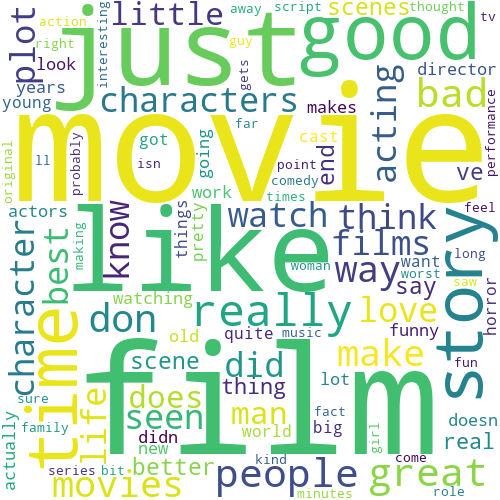

In [32]:
cloud = wc.generate_from_frequencies(tdm_df.sum().to_dict())
cloud.to_image()

## TF-IDF
- 단어 빈도(TF) 와 역문서 빈도(IDF) 곱한값
- 단어 빈도에 가중치를 주는 방법
- 문서빈도(DF): 각 단어가 등장한 문서 수
- 역문서 빈도(IDF): 총 문서 수를 DF로 나눈 값

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer(max_features=100, stop_words=stop_words)
tmp = tfidf_vec.fit_transform(df["review"])
tmp

<50000x100 sparse matrix of type '<class 'numpy.float64'>'
	with 808479 stored elements in Compressed Sparse Row format>

In [34]:
tfidf_df = pd.DataFrame( tmp.toarray(), columns=tfidf_vec.get_feature_names_out() )
tfidf_df

,acting,action,actors,actually,away,bad,best,better,big,bit,...,want,watch,watching,way,woman,work,world,worst,years,young
0,0.000000,0.000000,0.000000,0.0,0.362587,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.312702,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.272614,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.268270,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.199503,0.168985,0.244110,0.000000,0.000000,0.000000,0.204344,0.224635
3,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.150056,0.200933,0.000000,0.0,0.000000,0.000000,0.156014,0.000000,0.187944,0.0,...,0.000000,0.148908,0.000000,0.144133,0.000000,0.176151,0.188154,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.157229,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
49996,0.169262,0.000000,0.000000,0.0,0.000000,0.651161,0.000000,0.357836,0.000000,0.0,...,0.206193,0.335936,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
49997,0.200962,0.000000,0.000000,0.0,0.000000,0.193278,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
49998,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.392803,0.000000,0.000000,0.000000,0.000000,0.000000


# Similarity(유사도)

## 자카드 유사도(jaccard similarity)
- 교집합의 크기 / 합집합 크기

In [35]:
def jaccard_similarity(text1, text2):
    text1 = text1.split()
    text2 = text2.split()

    # 중복단어 제거
    text1 = set(text1)
    text2 = set(text2)

    # 교집합 단어 개수 구하기
    intersection_len = len( set.intersection(text1, text2) )

    # 합집합 단어 개수 구하기
    union_len = len( set.union(text1, text2) )
    return intersection_len / union_len

In [36]:
jaccard_similarity(df["review"][1], df["review"][2])

0.10849056603773585

## 코사인 유사도(cosine similarity)
- 코사인 유사도는 두 벡터 간의 코사인 각도를 이용하여 구할 수 있는 유사도
- 문서의 유사도를 구할 때 많이 사용
- -1 ~ 1 사이 값을 가지며, 1에 가까울 수록 유사도가 높다고 판단

$$
{\displaystyle {\text{similarity}}=\cos(\theta )={A\cdot B \over \|A\|\|B\|}={\frac {\sum \limits _{i=1}^{n}{A_{i}\times B_{i}}}{{\sqrt {\sum \limits _{i=1}^{n}{(A_{i})^{2}}}}\times {\sqrt {\sum \limits _{i=1}^{n}{(B_{i})^{2}}}}}}}
$$

In [37]:
from sklearn.metrics.pairwise import cosine_similarity

In [38]:
cosine_similarity(tdm_df.iloc[:1] , tdm_df.iloc[1:2]) # 2차원 형태로 전달해야함.

array([[0.16979054]])

In [39]:
cosine_similarity(tdm_df.iloc[:1] , tdm_df.iloc[1:]) # 0번 샘플과 다른 샘플들 간에 유사도 구해보기

array([[0.16979054, 0.20567735, 0.13151919, ..., 0.09863939, 0.        ,
        0.22933193]])

- 머신러닝 모델에 학습 시켜보기

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold

cv = KFold(n_splits=5, shuffle=True, random_state=SEED)
model = LogisticRegression(random_state=SEED)

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(tdm_df)
x_train.shape

(50000, 100)

In [42]:
scores = cross_val_score(model, x_train, target, cv=cv, scoring="accuracy")

c:\Users\jaeyeon\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jaeyeon\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jaeyeon\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\jaeyeon\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

In [43]:
scores.mean()

0.74292

In [51]:
tdm_df.loc[:,'acting'].value_counts(normalize=True)

0    0.78608
1    0.17950
2    0.02754
3    0.00544
4    0.00094
5    0.00036
6    0.00012
8    0.00002
Name: acting, dtype: float64

In [54]:
col_50=[col for col in tdm_df.columns if (tdm_df[col].value_counts(normalize=True) >= 0.5).any()]

len(col_50)

98

In [57]:
from sklearn.decomposition import TruncatedSVD
selected_data = tdm_df[col_50]

n_components = min(selected_data.shape) - 1  # SVD 컴포넌트 수 설정
svd = TruncatedSVD(n_components=n_components)
svd_result = svd.fit_transform(selected_data)

svd_df = pd.DataFrame(svd_result, columns=[f'SVD_{i+1}' for i in range(n_components)])

svd_df

,SVD_1,SVD_2,SVD_3,SVD_4,SVD_5,SVD_6,SVD_7,SVD_8,SVD_9,SVD_10,...,SVD_88,SVD_89,SVD_90,SVD_91,SVD_92,SVD_93,SVD_94,SVD_95,SVD_96,SVD_97
0,1.832199,0.612294,-1.239214,-1.201361,-0.205303,-0.383747,-0.085080,0.008734,-0.186902,-0.037116,...,0.679095,0.094537,0.121447,0.235456,-0.478101,-0.157213,-0.619032,0.854440,-0.191420,1.052184
1,1.306850,-0.715737,0.196858,-0.186105,0.550989,-0.017694,0.919235,-0.689434,0.063380,-0.057551,...,0.094403,0.005675,0.133507,-0.077585,-0.127448,0.073380,0.033241,-0.007517,-0.023256,-0.025745
2,1.557201,-0.904307,0.355029,-0.518704,0.815581,-0.422282,0.273584,-0.394201,-0.269365,0.172187,...,-0.228206,-0.025292,-0.177075,-0.028472,-0.237008,0.127612,-0.011425,-0.220990,-0.104696,0.018576
3,1.761662,0.755168,-0.180511,-1.284145,-0.401127,-0.812439,-0.177573,-0.224550,0.428295,-0.372423,...,-0.089621,-0.095094,-0.005475,0.016029,-0.069625,-0.019052,0.044862,-0.058868,0.002259,-0.015509
4,3.122022,-1.484727,0.128524,0.428357,1.316219,-1.265179,0.174187,1.724763,1.188063,-0.242258,...,0.121599,0.026277,-0.086903,0.410247,0.378500,0.635121,-0.209233,-0.138147,-0.156764,-0.294688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3.554165,1.544566,-0.318764,-0.215145,-0.412478,-0.655476,0.566972,1.138189,0.134772,1.474145,...,-0.107997,-0.015940,0.052649,-0.215192,0.046958,0.222483,0.223094,-0.533438,0.671853,-0.159312
49996,1.537094,0.395026,-1.457163,1.309088,1.735681,1.338211,-2.212576,-0.254428,-0.641008,-0.037564,...,-0.596390,-0.629473,-0.264930,-0.018561,-0.248166,-0.016158,-0.277217,-0.019376,0.216084,-0.058449
49997,2.434517,-0.716437,-0.888275,0.529725,-0.312227,-0.172011,-0.542001,2.424057,0.617107,0.619012,...,0.082720,0.043844,0.119888,0.036546,-0.141261,-0.061966,-0.050564,-0.015761,0.067796,-0.069487
49998,1.581191,0.497822,1.465618,-0.028204,-0.377830,0.021448,-0.515208,-0.544597,0.858858,-0.142796,...,-0.172581,0.052568,0.064280,0.132175,-0.035275,0.054272,-0.058180,-0.017792,-0.029550,-0.104325


In [58]:
tdm_df.drop(columns=col_50,inplace=True)
merged_df =pd.concat([tdm_df, svd_df], axis=1)
merged_df

,film,movie,SVD_1,SVD_2,SVD_3,SVD_4,SVD_5,SVD_6,SVD_7,SVD_8,...,SVD_88,SVD_89,SVD_90,SVD_91,SVD_92,SVD_93,SVD_94,SVD_95,SVD_96,SVD_97
0,0,0,1.832199,0.612294,-1.239214,-1.201361,-0.205303,-0.383747,-0.085080,0.008734,...,0.679095,0.094537,0.121447,0.235456,-0.478101,-0.157213,-0.619032,0.854440,-0.191420,1.052184
1,0,0,1.306850,-0.715737,0.196858,-0.186105,0.550989,-0.017694,0.919235,-0.689434,...,0.094403,0.005675,0.133507,-0.077585,-0.127448,0.073380,0.033241,-0.007517,-0.023256,-0.025745
2,0,0,1.557201,-0.904307,0.355029,-0.518704,0.815581,-0.422282,0.273584,-0.394201,...,-0.228206,-0.025292,-0.177075,-0.028472,-0.237008,0.127612,-0.011425,-0.220990,-0.104696,0.018576
3,2,3,1.761662,0.755168,-0.180511,-1.284145,-0.401127,-0.812439,-0.177573,-0.224550,...,-0.089621,-0.095094,-0.005475,0.016029,-0.069625,-0.019052,0.044862,-0.058868,0.002259,-0.015509
4,2,1,3.122022,-1.484727,0.128524,0.428357,1.316219,-1.265179,0.174187,1.724763,...,0.121599,0.026277,-0.086903,0.410247,0.378500,0.635121,-0.209233,-0.138147,-0.156764,-0.294688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,5,3.554165,1.544566,-0.318764,-0.215145,-0.412478,-0.655476,0.566972,1.138189,...,-0.107997,-0.015940,0.052649,-0.215192,0.046958,0.222483,0.223094,-0.533438,0.671853,-0.159312
49996,0,0,1.537094,0.395026,-1.457163,1.309088,1.735681,1.338211,-2.212576,-0.254428,...,-0.596390,-0.629473,-0.264930,-0.018561,-0.248166,-0.016158,-0.277217,-0.019376,0.216084,-0.058449
49997,0,1,2.434517,-0.716437,-0.888275,0.529725,-0.312227,-0.172011,-0.542001,2.424057,...,0.082720,0.043844,0.119888,0.036546,-0.141261,-0.061966,-0.050564,-0.015761,0.067796,-0.069487
49998,1,0,1.581191,0.497822,1.465618,-0.028204,-0.377830,0.021448,-0.515208,-0.544597,...,-0.172581,0.052568,0.064280,0.132175,-0.035275,0.054272,-0.058180,-0.017792,-0.029550,-0.104325


In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = scaler.fit_transform(merged_df)
train

array([[0.        , 0.        , 0.07732169, ..., 0.63262465, 0.56007752,
        0.48477171],
       [0.        , 0.        , 0.05515116, ..., 0.52216081, 0.57853314,
        0.31694439],
       [0.        , 0.        , 0.06571635, ..., 0.49480318, 0.56959528,
        0.32384493],
       ...,
       [0.        , 0.03448276, 0.10274046, ..., 0.52110426, 0.58852597,
        0.31013404],
       [0.03571429, 0.        , 0.06672877, ..., 0.52084401, 0.57784243,
        0.30470983],
       [0.        , 0.24137931, 0.08093801, ..., 0.48085846, 0.49268586,
        0.29111073]])

In [62]:
train.shape

(50000, 99)

# 데이터셋 클래스

In [ ]:
# import torch.utils
# import torch.utils.data


# class DataSet(torch.utils.data.Dataset):
#     def __init__(self,x,y)->None:
#         self.x=x
#         self.y=y
#         if self.y is not None:
#             self.y=self.y.reshape(-1,1)
            
#     def __len__(self)->len:
#         return len(self.x)
    
#     def __getitem__(self, index) -> dict:
#         item={}
#         item['x']=torch.Tensor(self.x)
        
#         if self.y is not None:
#             item['y']=torch.Tensor(self.y)
#         return item
    
    
# dataset=DataSet(train,target)
# dataloader=torch.utils.data.DataLoader(dataset,batch_size=4,shuffle=True)

# batch=next(iter(dataloader))['x']
# batch.shape

In [86]:
import torch.utils
from torch.utils.data import Dataset


class DataSet(Dataset):
    def __init__(self, x, y=None):
        self.x = x
        self.y = y
        if self.y is not None:
            self.y = self.y.reshape(-1, 1)
            
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        item = {'x': torch.Tensor(self.x[index])}
        
        if self.y is not None:
            item['y'] = torch.Tensor(self.y[index])
        return item
    
    
dataset=DataSet(train,target)
dataloader=torch.utils.data.DataLoader(dataset,batch_size=4,shuffle=True)

batch=next(iter(dataloader))['x']
batch.shape

torch.Size([4, 99])

# 모델 클래스

In [87]:
    

class Net(torch.nn.Module):
    def __init__(self, n_features, output_features=16):
        super().__init__()
        self.seq = torch.nn.Sequential(
            torch.nn.Linear(n_features, output_features),
            torch.nn.BatchNorm1d(output_features),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.4),
            torch.nn.Linear(output_features, output_features // 2),
            torch.nn.BatchNorm1d(output_features // 2),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.2),
            torch.nn.Linear(output_features // 2, 1),
        )
        
    def forward(self, x):
        return self.seq(x)
    
model=Net(train.shape[-1])
model(batch)

tensor([[-0.2588],
        [-0.2857],
        [-0.6741],
        [ 0.4165]], grad_fn=<AddmmBackward0>)

# 학습 loop 함수

In [92]:
from tqdm import tqdm

def train_loop(model, dataloader, optimizer, device='cuda', loss_fn=torch.nn.BCEWithLogitsLoss()):
    model.train()  # 모델을 학습 모드로 설정
    epoch_loss = 0
    
    for batch in dataloader:
        # 데이터와 레이블을 장치로 이동
        inputs = batch['x'].to(device)
        labels = batch['y'].to(device)
        
        # 예측 및 손실 계산
        pred = model(inputs)
        loss = loss_fn(pred, labels)
        
        # 옵티마이저 초기화 및 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 손실 축적
        epoch_loss += loss.item()
    
    # 평균 손실 계산
    epoch_loss /= len(dataloader)
    return epoch_loss

# 검증 및 테스트 loop 함수

In [93]:
from tqdm import tqdm

@torch.no_grad()
def test_loop(model, dataloader, device='cuda', loss_fn=torch.nn.BCEWithLogitsLoss()):
    model.eval()  # 모델을 학습 모드로 설정
    epoch_loss = 0
    pred_list=[]
    act_fn=torch.nn.Sigmoid()
    
    for batch in dataloader:
        inputs = batch['x'].to(device)
        labels = batch['y'].to(device)
        pred = model(inputs)
        
        if batch.get('y') is not None:
            loss = loss_fn(pred, labels)
            epoch_loss+=loss.item()
        
        pred=act_fn(pred).to('cpu').numpy()
        pred_list.append(pred)
    
    pred=np.concatenate(pred_list)
    epoch_loss /= len(dataloader)
    return epoch_loss,pred

# 하이퍼 파라미터 정의

In [89]:
batch_size = 32 # 배치 사이즈
loss_fn = torch.nn.BCEWithLogitsLoss() # 손실 객체
device = "cuda" if torch.cuda.is_available() else "cpu" # 장치 문자열
epochs = 100 # 최대 가능한 에폭수
n_splits = 5 # cv 에서 K 개수
n_features = train.shape[1] # 피처 개수

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# 학습

In [94]:
#gpu로 하셈..
best_score_list=[]
is_holdout=False
save_dir="D:\\NLP_Papers_Review\\weight\\imdb"

for i, (tri, vai) in enumerate( cv.split(train) ):
    # 학습용 데이터
    x_train = train[tri]
    y_train = target[tri]

    # 검증용 데이터
    x_valid = train[vai]
    y_valid = target[vai]

    # 학습용 데이터로더 객체
    train_dt = DataSet(x_train, y_train)
    train_dl = torch.utils.data.DataLoader(train_dt, batch_size=batch_size, shuffle=True)

    # 검증용 데이터로더 객체
    valid_dt = DataSet(x_valid, y_valid)
    valid_dl = torch.utils.data.DataLoader(valid_dt, batch_size=batch_size, shuffle=False)

    # 모델 객체와 옵티마이저 객체 생성
    model = Net(n_features).to(device)
    optimizer = torch.optim.Adam( model.parameters() )

    old_score = 0 # 현재 최고 점수
    patience = 0 # 조기 종료 조건을 주기 위한 변수
    for epoch in tqdm(range(epochs)):
        train_loss = train_loop(dataloader=train_dl, model=model, loss_fn=loss_fn, optimizer=optimizer, device=device)
        valid_loss, pred= test_loop(dataloader=valid_dl, model=model, loss_fn=loss_fn, device=device)

        new_score = roc_auc_score(y_valid, pred)

        print(train_loss, valid_loss, new_score)
        if new_score > old_score:
            best_score = new_score # 최고 점수 업데이트
            patience = 0
            torch.save(model.state_dict(), os.path.join(save_dir, f"model_imdb_{i}.pth")) # 최고 점수 모델 가중치 저장

        patience += 1
        if patience == 5:
            break

    print(f"{i}번째 폴드 최고 AUC: {best_score}")
    best_score_list.append(best_score)
    if is_holdout:
        break

  0%|          | 0/1250 [00:00<?, ?it/s]

100%|██████████| 313/313 [00:00<00:00, 1278.58it/s]


0.624798324894905 0.5407421744098297 0.8173952303258131


100%|██████████| 313/313 [00:00<00:00, 1326.55it/s]


0.5625626903772354 0.5275648779000718 0.8211924813505653


100%|██████████| 313/313 [00:00<00:00, 1241.69it/s]


0.5533719684123993 0.5192777309745265 0.8237431965360772


100%|██████████| 313/313 [00:00<00:00, 1106.06it/s]


0.549193530869484 0.5275848500263958 0.8234337177073854


100%|██████████| 313/313 [00:00<00:00, 1307.05it/s]


0.5462922269821167 0.5191172591794413 0.8224773395213365


100%|██████████| 313/313 [00:00<00:00, 1258.57it/s]


0.5453960065364838 0.5214165230147755 0.824278989133699


100%|██████████| 313/313 [00:00<00:00, 1315.66it/s]


0.5442686930656433 0.5237545382481413 0.8236204090656876


100%|██████████| 313/313 [00:00<00:00, 1083.26it/s]


0.5437835075616837 0.5184196828843687 0.8246348107818879


100%|██████████| 313/313 [00:00<00:00, 1139.11it/s]


0.5412332980632782 0.5230246026295061 0.8229990312610619


100%|██████████| 313/313 [00:00<00:00, 1133.72it/s]


0.5414930897951126 0.526980554333891 0.8240924177826979


100%|██████████| 313/313 [00:00<00:00, 1386.01it/s]


0.5405471632242203 0.5196736544465866 0.8243524536032771


100%|██████████| 313/313 [00:00<00:00, 981.83it/s] 


0.5405001394748687 0.517760317546491 0.8248842859599578


100%|██████████| 313/313 [00:00<00:00, 1209.20it/s]


0.5401545565605164 0.5184124641525097 0.826239628418993


100%|██████████| 313/313 [00:00<00:00, 1200.29it/s]


0.5417588914871215 0.5223274289038234 0.8256104501397865


100%|██████████| 313/313 [00:00<00:00, 1245.19it/s]


0.5407251579523087 0.5173303883867904 0.8244024966478962


100%|██████████| 313/313 [00:00<00:00, 1149.97it/s]


0.5387991026163101 0.5194300052266532 0.8258846068194788


100%|██████████| 313/313 [00:00<00:00, 974.85it/s]


0.5372837388277054 0.515486951072376 0.8247382570755606


100%|██████████| 313/313 [00:00<00:00, 1105.04it/s]


0.5379642848968506 0.5200469413885294 0.8256527327122583


100%|██████████| 313/313 [00:00<00:00, 1004.99it/s]


0.537060980439186 0.5146638820536982 0.8261511830379761


100%|██████████| 313/313 [00:00<00:00, 1156.32it/s]


0.5359395058870315 0.517396298079445 0.8250781777563346


100%|██████████| 313/313 [00:00<00:00, 1101.83it/s]


0.5379176534414292 0.5158222596675824 0.8265199054710489


100%|██████████| 313/313 [00:00<00:00, 925.58it/s]


0.5372001214265824 0.5249505816176295 0.8255916889983587


100%|██████████| 313/313 [00:00<00:00, 1203.60it/s]


0.5370685188055039 0.5224536080329943 0.8253726156699374


100%|██████████| 313/313 [00:00<00:00, 1145.05it/s]


0.53728467233181 0.5143423541285359 0.8263103527218596


100%|██████████| 313/313 [00:00<00:00, 1058.50it/s]


0.5363170501708985 0.5181551833693593 0.8258277233586893


100%|██████████| 313/313 [00:00<00:00, 818.64it/s]


0.5381025351285934 0.5141102656388816 0.8271807256753501


100%|██████████| 313/313 [00:00<00:00, 1175.87it/s]


0.5351682763576507 0.5195264129783399 0.8266222116953595


100%|██████████| 313/313 [00:00<00:00, 1144.92it/s]


0.5367543681144714 0.5198465255312265 0.8264123589279171


100%|██████████| 313/313 [00:00<00:00, 915.46it/s]


0.5373773385763169 0.5155820957007119 0.8264544814906539


100%|██████████| 313/313 [00:00<00:00, 1119.41it/s]


0.5364733018636704 0.5181214852264514 0.8261176409972784


100%|██████████| 313/313 [00:00<00:00, 1149.78it/s]


0.5378103382587432 0.5231150328732146 0.8256783942735075


100%|██████████| 313/313 [00:00<00:00, 1100.51it/s]


0.5338565065145493 0.5148711174059981 0.8273082934365728


100%|██████████| 313/313 [00:00<00:00, 1176.91it/s]


0.5363930938959122 0.5161960835274035 0.825944290450631


100%|██████████| 313/313 [00:00<00:00, 1061.54it/s]


0.535507182097435 0.5145215403538542 0.8258860669083106


100%|██████████| 313/313 [00:00<00:00, 989.75it/s] 


0.5346864481210709 0.5197708721930226 0.8256790343124476


100%|██████████| 313/313 [00:00<00:00, 1142.41it/s]


0.5361984102010727 0.5188001428549283 0.8253988972689099


100%|██████████| 313/313 [00:00<00:00, 1223.70it/s]


0.5337267804145813 0.5225657095162632 0.8252705294590124


100%|██████████| 313/313 [00:00<00:00, 1069.02it/s]


0.5366946555376053 0.5163540783019873 0.826314112950632


100%|██████████| 313/313 [00:00<00:00, 840.86it/s]


0.5363048990964889 0.5182144694244519 0.8256803143903275


100%|██████████| 313/313 [00:00<00:00, 878.33it/s]


0.5352594834566117 0.5165263314407093 0.8273631367732412


100%|██████████| 313/313 [00:00<00:00, 1169.50it/s]


0.5340489178657531 0.5204942489203553 0.8267446191426286


100%|██████████| 313/313 [00:00<00:00, 1212.32it/s]


0.5355430925607682 0.5165250375628853 0.8260681779879488


100%|██████████| 313/313 [00:00<00:00, 1135.73it/s]


0.5345450863838196 0.5226066713325512 0.8266741548555814


100%|██████████| 313/313 [00:00<00:00, 1143.44it/s]


0.5361332183122635 0.5158927204509893 0.8276360533774875


100%|██████████| 313/313 [00:00<00:00, 975.35it/s]


0.5352998545408248 0.5158243396411688 0.8264074186273493


100%|██████████| 313/313 [00:00<00:00, 980.80it/s] 


0.5303587074518203 0.5140997863615664 0.8271149616742682


100%|██████████| 313/313 [00:00<00:00, 1079.46it/s]


0.5344139797210693 0.5202143527448367 0.8265472071320819


100%|██████████| 313/313 [00:00<00:00, 953.28it/s]


0.5319613797903061 0.5175171775368456 0.8268755871107197


100%|██████████| 313/313 [00:00<00:00, 1071.39it/s]


0.5354720439434052 0.510700160417313 0.8273920385316242


100%|██████████| 313/313 [00:00<00:00, 1128.68it/s]


0.5333681228876114 0.5178395461160153 0.8266677744673987


100%|██████████| 313/313 [00:00<00:00, 1051.82it/s]


0.532831328868866 0.5154546080305934 0.8271276824482002


100%|██████████| 313/313 [00:00<00:00, 885.38it/s]


0.5353388748168946 0.5211586521837277 0.8259053880838111


100%|██████████| 313/313 [00:00<00:00, 1055.52it/s]


0.5325382505655288 0.5134744540380594 0.827192486390872


100%|██████████| 313/313 [00:00<00:00, 1050.07it/s]


0.5352707540273667 0.5232050816852826 0.826665194310422


100%|██████████| 313/313 [00:00<00:00, 929.47it/s] 


0.5331056687593461 0.5146431199277932 0.8273158338953341


100%|██████████| 313/313 [00:00<00:00, 1130.16it/s]


0.5335674287676812 0.5130442483737446 0.827365076891278


100%|██████████| 313/313 [00:00<00:00, 1196.09it/s]


0.5338375113487244 0.5154784083747255 0.8271555841457394


100%|██████████| 313/313 [00:00<00:00, 1074.85it/s]


0.5357602809906006 0.514338052691743 0.8271166617777026


100%|██████████| 313/313 [00:00<00:00, 806.36it/s]


0.5324783819437027 0.5118749434003433 0.8275969509984987


100%|██████████| 313/313 [00:00<00:00, 1027.27it/s]


0.5359826969385147 0.5155644387292405 0.8270402971316775


100%|██████████| 313/313 [00:00<00:00, 828.65it/s]


0.5335303941488266 0.5133703063471249 0.826542606852201


100%|██████████| 313/313 [00:00<00:00, 870.37it/s]


0.5314763167381287 0.5165955015836051 0.8265256858227256


100%|██████████| 313/313 [00:00<00:00, 912.35it/s]


0.5333174148321151 0.5160083726000863 0.826884587658313


100%|██████████| 313/313 [00:00<00:00, 1176.57it/s]


0.5336701097011566 0.516023835149436 0.8262455887816215


100%|██████████| 313/313 [00:00<00:00, 1005.70it/s]


0.5342389633178711 0.5145216014819404 0.8263546554172355


100%|██████████| 313/313 [00:00<00:00, 979.27it/s] 


0.5309214257240296 0.5114477618624227 0.8272731712997419


100%|██████████| 313/313 [00:00<00:00, 1129.35it/s]


0.5356568614959717 0.5154237573900924 0.8267645803570689


100%|██████████| 313/313 [00:00<00:00, 1150.73it/s]


0.5352178108692169 0.5145673647094459 0.8268111631911685


100%|██████████| 313/313 [00:00<00:00, 1168.95it/s]


0.5310566524028778 0.5132592996469321 0.827150583841521


100%|██████████| 313/313 [00:00<00:00, 1077.06it/s]


0.5329343441724778 0.5149036564956457 0.8270411971864368


100%|██████████| 313/313 [00:00<00:00, 1138.14it/s]


0.5328751296520233 0.5164971742957545 0.8273076333964159


100%|██████████| 313/313 [00:00<00:00, 951.59it/s]


0.5327000681638717 0.5122857703187595 0.8268611062297031


100%|██████████| 313/313 [00:00<00:00, 1033.45it/s]


0.5332365813732147 0.5165714495859969 0.8263613758261054


100%|██████████| 313/313 [00:00<00:00, 1117.81it/s]


0.5344186597585678 0.5151676123325055 0.8269351307333539


100%|██████████| 313/313 [00:00<00:00, 798.78it/s]


0.5313045274734497 0.5195989171727396 0.8265792290802972


100%|██████████| 313/313 [00:00<00:00, 701.36it/s]


0.5340751259088516 0.5125414831950642 0.8268952083044732


100%|██████████| 313/313 [00:00<00:00, 922.07it/s]


0.5350365472316742 0.513377578685078 0.8267745009606384


100%|██████████| 313/313 [00:00<00:00, 435.05it/s]


0.5342609556436538 0.5165432870578461 0.8267441991170744


100%|██████████| 313/313 [00:00<00:00, 590.99it/s]


0.5319430083990097 0.513687109318785 0.8267427590294594


100%|██████████| 313/313 [00:00<00:00, 512.78it/s]


0.5323973160266876 0.5157027121740408 0.8266228917367333


100%|██████████| 313/313 [00:00<00:00, 492.81it/s]


0.533059160232544 0.5154064060590519 0.826548327200227


100%|██████████| 313/313 [00:01<00:00, 307.42it/s]


0.5326285050392151 0.5122418326501268 0.8266423729219685


100%|██████████| 313/313 [00:00<00:00, 759.80it/s]


0.5321343782663346 0.5181877459771336 0.8267611801502004


100%|██████████| 313/313 [00:00<00:00, 502.74it/s]


0.5315633231163025 0.5162956984088825 0.8267262380243213


100%|██████████| 313/313 [00:00<00:00, 964.11it/s]


0.5329847763061524 0.5174153423347412 0.827386058167779


100%|██████████| 313/313 [00:00<00:00, 1013.56it/s]


0.5333536237001419 0.5163173508910707 0.8272500298918186


100%|██████████| 313/313 [00:00<00:00, 740.72it/s]


0.5311039085149765 0.5118514991606387 0.8269609123019045


100%|██████████| 313/313 [00:00<00:00, 340.89it/s]


0.5327162539720536 0.5124186794407452 0.8267271980827314


100%|██████████| 313/313 [00:00<00:00, 377.45it/s]


0.5330513184785843 0.5160229813557463 0.8268573259997138


100%|██████████| 313/313 [00:00<00:00, 701.14it/s]


0.5318211300611496 0.5140838078416574 0.8265101648784312


100%|██████████| 313/313 [00:00<00:00, 435.01it/s]


0.5315865806579589 0.5115798147151265 0.8271310026502012


100%|██████████| 313/313 [00:00<00:00, 487.27it/s]


0.531876926279068 0.5143322285752707 0.8269450913393571


100%|██████████| 313/313 [00:00<00:00, 415.63it/s]


0.5314338646650314 0.5128614536870402 0.8270833797528241


100%|██████████| 313/313 [00:00<00:00, 679.35it/s]


0.5332397245168686 0.5145413045304271 0.8266915359130449


100%|██████████| 313/313 [00:00<00:00, 471.21it/s]


0.5335776660203934 0.518194324387529 0.827355556312046


100%|██████████| 313/313 [00:00<00:00, 749.59it/s]


0.5307693409919739 0.5139690708047666 0.8269933542756742


100%|██████████| 313/313 [00:00<00:00, 904.00it/s]


0.5310017634868622 0.5165643236888483 0.8277205585187802


100%|██████████| 313/313 [00:00<00:00, 680.72it/s]


0.5342406056880951 0.5132530810543523 0.8277722416631828


100%|██████████| 313/313 [00:00<00:00, 1164.21it/s]


0.5338822618246079 0.5135141898648807 0.8271783655317589


100%|██████████| 313/313 [00:00<00:00, 503.78it/s]


0.5338953236579895 0.5141065076898081 0.8273969788321921
0번째 폴드 최고 AUC: 0.8273969788321921


100%|██████████| 313/313 [00:00<00:00, 1120.35it/s]


0.6097642679452896 0.5398591814901882 0.8172337084490969


100%|██████████| 313/313 [00:00<00:00, 687.82it/s]


0.5511861969709396 0.5259136821324832 0.8218312926293367


100%|██████████| 313/313 [00:00<00:00, 714.79it/s]


0.5454801588535308 0.5199748702323475 0.8230592511381157


100%|██████████| 313/313 [00:00<00:00, 699.60it/s]


0.5443056310176849 0.5246455703680508 0.8235181455290438


100%|██████████| 313/313 [00:00<00:00, 980.90it/s]


0.5439781527996064 0.5281018002535969 0.8226213774063954


100%|██████████| 313/313 [00:00<00:00, 1114.68it/s]


0.5413397160768509 0.5205907799755803 0.822997449200007


100%|██████████| 313/313 [00:00<00:00, 908.32it/s] 


0.5403670046329498 0.5252852868348264 0.8223626892939364


100%|██████████| 313/313 [00:00<00:00, 934.31it/s]


0.540111021566391 0.5215761147368069 0.8232426768903474


100%|██████████| 313/313 [00:00<00:00, 631.74it/s]


0.5375939470291138 0.5398978091086062 0.8237525928813128


100%|██████████| 313/313 [00:00<00:00, 983.73it/s] 


0.5402157177686692 0.5197488900762015 0.8233753810519499


100%|██████████| 313/313 [00:00<00:00, 971.20it/s] 


0.5370223029375076 0.5219747768804288 0.8233310996632854


100%|██████████| 313/313 [00:00<00:00, 818.65it/s]


0.5380865578651428 0.5178459975094841 0.8237348923262233


100%|██████████| 313/313 [00:00<00:00, 612.40it/s]


0.5371846826553345 0.5202460283288559 0.8240405419113943


100%|██████████| 313/313 [00:00<00:00, 721.83it/s]


0.5360554280519485 0.5191222957719248 0.8234785842884031


100%|██████████| 313/313 [00:00<00:00, 892.29it/s]


0.5356999128580093 0.5174812203207717 0.8238894771740041


100%|██████████| 313/313 [00:00<00:00, 780.86it/s]


0.5338551466941833 0.5160701500531584 0.8232648975871883


100%|██████████| 313/313 [00:00<00:00, 825.55it/s]


0.5360786683559418 0.5158373344058808 0.8231671145207113


100%|██████████| 313/313 [00:00<00:00, 835.58it/s]


0.5371725977659225 0.5160950471798833 0.8244570149719895


100%|██████████| 313/313 [00:00<00:00, 728.22it/s]


0.5355660658836364 0.5165893007010317 0.8248080659809491


100%|██████████| 313/313 [00:00<00:00, 712.49it/s]


0.5328990488290787 0.5181729773553415 0.8238735966759919


100%|██████████| 313/313 [00:00<00:00, 315.86it/s]


0.5363424056768418 0.5163390165129409 0.8243287709502569


100%|██████████| 313/313 [00:00<00:00, 737.22it/s]


0.5355086364746093 0.5177378787781103 0.8242361480456026


100%|██████████| 313/313 [00:00<00:00, 1168.31it/s]


0.5345270726442337 0.5158317475654066 0.8238706565837904


100%|██████████| 313/313 [00:00<00:00, 1050.48it/s]


0.536586430978775 0.517790797038581 0.8239559992601369


100%|██████████| 313/313 [00:00<00:00, 988.02it/s] 


0.5330251190662384 0.5189796972769899 0.8242794894047877


100%|██████████| 313/313 [00:00<00:00, 882.58it/s]


0.5356542572021484 0.51957684412551 0.8239014375490816


100%|██████████| 313/313 [00:00<00:00, 575.52it/s]


0.5340156518697738 0.5186920975343868 0.8239168780332952


100%|██████████| 313/313 [00:00<00:00, 951.76it/s]


0.5349873434782029 0.520286722495533 0.823838915588393


100%|██████████| 313/313 [00:00<00:00, 764.03it/s]


0.5323522302389145 0.5196206324016706 0.8243158505450732


100%|██████████| 313/313 [00:00<00:00, 513.53it/s]


0.5336449721336365 0.5200942099665682 0.8239953804951323


100%|██████████| 313/313 [00:00<00:00, 668.04it/s]


0.531403094792366 0.5226128327960785 0.8238321353757654


100%|██████████| 313/313 [00:00<00:00, 368.18it/s]


0.5313629036188126 0.5186393234295587 0.8221734433591837


100%|██████████| 313/313 [00:00<00:00, 619.91it/s]


0.5337659244775772 0.519374351817579 0.8233600405708723


100%|██████████| 313/313 [00:00<00:00, 408.03it/s]


0.5326908230543137 0.5186955677434659 0.8232262163741454


100%|██████████| 313/313 [00:00<00:00, 718.59it/s]


0.5335161029100418 0.5199761815345325 0.8230089695612854


100%|██████████| 313/313 [00:00<00:00, 488.49it/s]


0.5313193885087967 0.5165632887960623 0.8239257583117807


100%|██████████| 313/313 [00:00<00:00, 494.90it/s]


0.5315439590454102 0.519299076959348 0.8239386987175918


100%|██████████| 313/313 [00:01<00:00, 246.13it/s]


0.5332002888917923 0.5189988487444747 0.8237943341903202


100%|██████████| 313/313 [00:00<00:00, 1089.53it/s]


0.5319784998416901 0.5168108706847547 0.8235504065407492


100%|██████████| 313/313 [00:00<00:00, 1157.17it/s]


0.5305992756128312 0.5158361992516076 0.8240279415162459


100%|██████████| 313/313 [00:00<00:00, 772.62it/s]


0.5310516118764878 0.5166455286379439 0.8236197087140652


100%|██████████| 313/313 [00:00<00:00, 871.95it/s] 


0.5313048775911331 0.5197245351041848 0.8234069820429568


100%|██████████| 313/313 [00:00<00:00, 1249.71it/s]


0.5318059459209442 0.5199251494849452 0.8244661152573745


100%|██████████| 313/313 [00:00<00:00, 902.66it/s]


0.5298918390989303 0.521875936954547 0.8254615664747247


100%|██████████| 313/313 [00:00<00:00, 856.10it/s]


0.5336157640457153 0.5172784195159571 0.8250694741787103


100%|██████████| 313/313 [00:00<00:00, 499.79it/s]


0.5320800701379776 0.5136476840835791 0.8248436670974002


100%|██████████| 313/313 [00:00<00:00, 572.03it/s]


0.531019411277771 0.5197951960297057 0.8253430827590753


100%|██████████| 313/313 [00:01<00:00, 294.00it/s]


0.5337388104438782 0.5154457617872439 0.8251010351684629


100%|██████████| 313/313 [00:01<00:00, 256.54it/s]


0.5304351571798325 0.5153547308315485 0.8249437902372618


100%|██████████| 313/313 [00:01<00:00, 227.49it/s]


0.5330509171724319 0.5155579482023709 0.8256617727531936


100%|██████████| 313/313 [00:01<00:00, 216.37it/s]


0.5319919590711594 0.5151762160630272 0.825992043110472


100%|██████████| 313/313 [00:01<00:00, 211.95it/s]


0.5315777230739593 0.5139279106554513 0.8257934968840621


100%|██████████| 313/313 [00:00<00:00, 367.84it/s]


0.531442549419403 0.520210143857109 0.8250940549495633


100%|██████████| 313/313 [00:01<00:00, 228.94it/s]


0.5316604933738709 0.5161731990571982 0.8258697592756509


100%|██████████| 313/313 [00:01<00:00, 275.07it/s]


0.5332518963098526 0.5179335242643143 0.8252926011759729


100%|██████████| 313/313 [00:00<00:00, 342.85it/s]


0.5301858676195145 0.5155760078384473 0.8255501092514261


100%|██████████| 313/313 [00:00<00:00, 320.41it/s]


0.5316181157827378 0.5154851983530453 0.8247059627789928


100%|██████████| 313/313 [00:01<00:00, 307.82it/s]


0.5324682369947433 0.516744561469593 0.8256144312685646


100%|██████████| 313/313 [00:00<00:00, 697.46it/s]


0.5320844570398331 0.5159831217493112 0.8252638802752854


100%|██████████| 313/313 [00:00<00:00, 1148.85it/s]


0.5293625760793685 0.5132280567202705 0.8241221444704507


100%|██████████| 313/313 [00:00<00:00, 614.40it/s]


0.5305335606336594 0.5165721434183395 0.8242163874259096


100%|██████████| 313/313 [00:00<00:00, 987.28it/s] 


0.5307867087125778 0.5167653642523403 0.8236833107086239


100%|██████████| 313/313 [00:00<00:00, 768.16it/s]


0.5316052129268646 0.5181240945959243 0.8244365143290894


100%|██████████| 313/313 [00:00<00:00, 946.64it/s]


0.5316642305135727 0.5137823945798051 0.8247492041350417


100%|██████████| 313/313 [00:00<00:00, 1008.60it/s]


0.5309045840263367 0.5169497456984778 0.8245405775925132


100%|██████████| 313/313 [00:00<00:00, 637.71it/s]


0.53182835521698 0.5185758307719002 0.8236611500136645


100%|██████████| 313/313 [00:01<00:00, 201.62it/s]


0.5323559299230576 0.5193201728141346 0.8250911348579891


100%|██████████| 313/313 [00:00<00:00, 335.05it/s]


0.5316691256999969 0.5173959626366917 0.8253948643829472


100%|██████████| 313/313 [00:01<00:00, 305.68it/s]


0.5305338407754898 0.5129092406160154 0.825635771937808


100%|██████████| 313/313 [00:00<00:00, 330.70it/s]


0.53033610496521 0.5153594539759639 0.8247949855707475


100%|██████████| 313/313 [00:00<00:00, 325.68it/s]


0.5292895063400268 0.5137879228630005 0.8257085542202605


100%|██████████| 313/313 [00:00<00:00, 555.02it/s]


0.529453752207756 0.5160056673490201 0.8254483860613869


100%|██████████| 313/313 [00:00<00:00, 653.64it/s]


0.5321927419424057 0.513073663075511 0.8252382794724442


100%|██████████| 313/313 [00:00<00:00, 775.83it/s]


0.5318106402158738 0.520097336068321 0.8246191400562322


100%|██████████| 313/313 [00:00<00:00, 756.25it/s]


0.5297876628875733 0.5159345133045611 0.8252441196555924


100%|██████████| 313/313 [00:01<00:00, 285.21it/s]


0.5282437479972839 0.5128908572486415 0.8254694667224765


100%|██████████| 313/313 [00:00<00:00, 313.84it/s]


0.5297705601930618 0.5154098964537295 0.8253064016087543


100%|██████████| 313/313 [00:00<00:00, 352.42it/s]


0.5305463958978653 0.5191475617618987 0.8247243633560347


100%|██████████| 313/313 [00:00<00:00, 339.07it/s]


0.5290453709602356 0.5166725985729657 0.8241186043594328


100%|██████████| 313/313 [00:01<00:00, 302.47it/s]


0.5284815348148346 0.5191075944671997 0.8236443294861728


100%|██████████| 313/313 [00:00<00:00, 342.06it/s]


0.5320628319501877 0.5178861407616648 0.8248811282721826


100%|██████████| 313/313 [00:01<00:00, 246.55it/s]


0.5309619738101959 0.520722965462901 0.825358063228863


100%|██████████| 313/313 [00:00<00:00, 781.99it/s]


0.5298075626850128 0.5176014884973106 0.8252304392265741


100%|██████████| 313/313 [00:00<00:00, 359.04it/s]


0.5290356746912003 0.5189424418031979 0.8248380469211514


100%|██████████| 313/313 [00:00<00:00, 316.48it/s]


0.5314806722402573 0.5198123696893929 0.8247702447948768


100%|██████████| 313/313 [00:00<00:00, 335.84it/s]


0.528951368522644 0.5171764876705389 0.8249641308751443


100%|██████████| 313/313 [00:00<00:00, 333.52it/s]


0.5306730883121491 0.5154056710937914 0.8246640814655948


100%|██████████| 313/313 [00:00<00:00, 363.08it/s]


0.5302469468593597 0.5189800746143817 0.8250646540275504


100%|██████████| 313/313 [00:00<00:00, 367.60it/s]


0.5287007648468017 0.5160260886049118 0.8251553368713642


100%|██████████| 313/313 [00:00<00:00, 340.18it/s]


0.5314838538885116 0.5148882637389551 0.8252587201134628


100%|██████████| 313/313 [00:00<00:00, 343.49it/s]


0.5321332326889038 0.5179249297696561 0.8256531924841164


100%|██████████| 313/313 [00:00<00:00, 1189.73it/s]


0.5295142957210541 0.5148362648753694 0.8252603201636404


100%|██████████| 313/313 [00:00<00:00, 1137.35it/s]


0.5306631013154983 0.5137349691825172 0.8252109186144079


100%|██████████| 313/313 [00:00<00:00, 1023.73it/s]


0.5288513909578323 0.517376963608562 0.824788665372546


100%|██████████| 313/313 [00:00<00:00, 1060.60it/s]


0.5290019002437591 0.5136747622070983 0.8258688992486806


100%|██████████| 313/313 [00:00<00:00, 1068.71it/s]


0.5297900593996048 0.5154866981811036 0.8256590726685189


100%|██████████| 313/313 [00:00<00:00, 996.86it/s] 


0.5274386981725693 0.5171440000922535 0.8249118492355921


100%|██████████| 313/313 [00:00<00:00, 873.08it/s]


0.5287763662576676 0.5158823365791918 0.8250987550969598


100%|██████████| 313/313 [00:00<00:00, 342.76it/s]


0.5284002758264542 0.5160610149272333 0.8243466315103642


100%|██████████| 313/313 [00:00<00:00, 1145.66it/s]


0.5292047984600067 0.5179148611550133 0.8251442565238846
1번째 폴드 최고 AUC: 0.8251442565238846


100%|██████████| 313/313 [00:00<00:00, 875.90it/s]


0.6045449081420898 0.5804056473814261 0.81615158


100%|██████████| 313/313 [00:00<00:00, 1061.17it/s]


0.555041198348999 0.5155236704852253 0.82661126


100%|██████████| 313/313 [00:00<00:00, 654.15it/s]


0.546341136789322 0.5157364761105742 0.82763414


100%|██████████| 313/313 [00:00<00:00, 782.99it/s]


0.5438053795814514 0.5154527334359508 0.82822772


100%|██████████| 313/313 [00:00<00:00, 807.91it/s]


0.5447485795259476 0.5155151338813404 0.82704116


100%|██████████| 313/313 [00:00<00:00, 823.64it/s]


0.5420651612281799 0.5139992102837792 0.8264644999999999


100%|██████████| 313/313 [00:00<00:00, 755.77it/s]


0.5409731155872345 0.5114314680853591 0.8283071399999999


100%|██████████| 313/313 [00:00<00:00, 915.99it/s]


0.5395767673969268 0.5151354969499972 0.8274221199999999


100%|██████████| 313/313 [00:00<00:00, 697.61it/s]


0.5406331819534301 0.5102065334114404 0.82765088


100%|██████████| 313/313 [00:00<00:00, 766.48it/s]


0.5398611309289932 0.5111343823492337 0.82787274


100%|██████████| 313/313 [00:00<00:00, 812.06it/s]


0.5413850060701371 0.5162329809924665 0.82874968


100%|██████████| 313/313 [00:00<00:00, 779.23it/s]


0.5380298871994018 0.5139918092150277 0.8285880800000001


100%|██████████| 313/313 [00:00<00:00, 698.54it/s]


0.5371645414352417 0.5150608614610788 0.8278919399999999


100%|██████████| 313/313 [00:00<00:00, 871.09it/s]


0.537625705575943 0.5151534310925883 0.8277145199999999


100%|██████████| 313/313 [00:00<00:00, 816.06it/s]


0.5356962493896484 0.5126965240167733 0.82802404


100%|██████████| 313/313 [00:00<00:00, 793.17it/s]


0.5362821673631668 0.5119071111511498 0.8278900199999999


100%|██████████| 313/313 [00:00<00:00, 869.20it/s]


0.5353533355712891 0.5169116816581628 0.8269699


100%|██████████| 313/313 [00:00<00:00, 839.34it/s]


0.5363875616550445 0.5247398899576534 0.8268866199999999


100%|██████████| 313/313 [00:00<00:00, 851.38it/s]


0.5353167016744613 0.5122818064194518 0.82684188


100%|██████████| 313/313 [00:00<00:00, 813.43it/s]


0.536206354212761 0.5134463200744349 0.82725634


100%|██████████| 313/313 [00:00<00:00, 901.28it/s]


0.535536828994751 0.5117105013265396 0.8273244200000001


100%|██████████| 313/313 [00:00<00:00, 741.98it/s]


0.5349616693019867 0.5099171798069256 0.82836898


100%|██████████| 313/313 [00:00<00:00, 863.00it/s]


0.5356171318292617 0.5125957575088111 0.8283770800000001


100%|██████████| 313/313 [00:00<00:00, 925.67it/s]


0.5355384761095047 0.5130869036855789 0.8270683199999999


100%|██████████| 313/313 [00:00<00:00, 863.52it/s]


0.5341557393312454 0.5150772088442367 0.8278482600000001


100%|██████████| 313/313 [00:00<00:00, 831.95it/s]


0.5365108790397644 0.5102458192517583 0.8276520200000002


100%|██████████| 313/313 [00:00<00:00, 946.61it/s]


0.5348081938266754 0.5116997827737095 0.82786706


100%|██████████| 313/313 [00:00<00:00, 866.82it/s]


0.5365908785820007 0.5193494431698285 0.8265196800000001


100%|██████████| 313/313 [00:00<00:00, 869.59it/s]


0.5340876918077468 0.5135894167347076 0.82787178


100%|██████████| 313/313 [00:00<00:00, 880.28it/s]


0.5337818733692169 0.5133035774238575 0.8288156


100%|██████████| 313/313 [00:00<00:00, 951.08it/s]


0.5333152612686157 0.5134669728934194 0.82795532


100%|██████████| 313/313 [00:00<00:00, 830.39it/s]


0.5345927668094635 0.5130470050409579 0.8280244799999998


100%|██████████| 313/313 [00:00<00:00, 957.73it/s]


0.536185037112236 0.5103618627348647 0.8273501799999999


100%|██████████| 313/313 [00:00<00:00, 905.29it/s]


0.5333289641618728 0.5115591469473733 0.8284366999999999


100%|██████████| 313/313 [00:00<00:00, 805.76it/s]


0.5351052158117294 0.5127749624915017 0.8298023999999999


100%|██████████| 313/313 [00:00<00:00, 829.66it/s]


0.534608968925476 0.5124244818481775 0.8284649000000002


100%|██████████| 313/313 [00:00<00:00, 724.96it/s]


0.5321651462078094 0.5097481377018146 0.82815726


100%|██████████| 313/313 [00:00<00:00, 807.36it/s]


0.5331591186285018 0.509622541193764 0.8285623799999999


100%|██████████| 313/313 [00:00<00:00, 774.01it/s]


0.5316818671941758 0.5106829003023263 0.82783012


100%|██████████| 313/313 [00:00<00:00, 938.22it/s]


0.5342474182367325 0.5158207242290813 0.8269739400000001


100%|██████████| 313/313 [00:00<00:00, 888.07it/s]


0.5332924144744873 0.5206612029585975 0.82860222


100%|██████████| 313/313 [00:00<00:00, 869.22it/s]


0.5337547785758973 0.5128502757214128 0.82900034


100%|██████████| 313/313 [00:00<00:00, 942.99it/s]


0.5331893282413482 0.5158991948865093 0.8272579400000002


100%|██████████| 313/313 [00:00<00:00, 702.57it/s]


0.5319450246572495 0.5122172615398615 0.82891918


100%|██████████| 313/313 [00:00<00:00, 345.27it/s]


0.534332418513298 0.5090933335474885 0.8300621799999999


100%|██████████| 313/313 [00:00<00:00, 384.22it/s]


0.5313581210136413 0.5130903512334671 0.8278747400000002


100%|██████████| 313/313 [00:00<00:00, 1050.58it/s]


0.5336257692575455 0.5125762144216714 0.82894852


100%|██████████| 313/313 [00:00<00:00, 897.29it/s]


0.5322244275569916 0.513504089829259 0.82869352


100%|██████████| 313/313 [00:00<00:00, 1087.55it/s]


0.5348369104385376 0.5135666338590007 0.8277794


100%|██████████| 313/313 [00:00<00:00, 387.97it/s]


0.5316008930683136 0.5116658059362406 0.82716804


100%|██████████| 313/313 [00:00<00:00, 350.32it/s]


0.5347598641633987 0.5156526780737856 0.82770516


100%|██████████| 313/313 [00:00<00:00, 390.82it/s]


0.5320673084259033 0.5129397595271515 0.8281802200000001


100%|██████████| 313/313 [00:00<00:00, 339.42it/s]


0.533167959856987 0.5151543117369326 0.82808382


100%|██████████| 313/313 [00:00<00:00, 388.80it/s]


0.5308066867351532 0.517557779535318 0.8272457


100%|██████████| 313/313 [00:00<00:00, 387.86it/s]


0.5339263308286667 0.5109604347628146 0.8289674


100%|██████████| 313/313 [00:00<00:00, 384.40it/s]


0.5324158559799195 0.5156765619215493 0.8283412199999999


100%|██████████| 313/313 [00:00<00:00, 395.64it/s]


0.5334664587497712 0.5134514013227944 0.82756878


100%|██████████| 313/313 [00:00<00:00, 401.31it/s]


0.531425568819046 0.5147344803276915 0.82767908


100%|██████████| 313/313 [00:00<00:00, 403.04it/s]


0.5323728375434875 0.5101954309513774 0.8286927


100%|██████████| 313/313 [00:00<00:00, 402.74it/s]


0.5312855337142944 0.5183042722007337 0.8272899199999999


100%|██████████| 313/313 [00:00<00:00, 406.78it/s]


0.532110238647461 0.5132499455263059 0.82740808


100%|██████████| 313/313 [00:00<00:00, 381.65it/s]


0.532389132642746 0.5103118352044504 0.8276205999999999


100%|██████████| 313/313 [00:00<00:00, 370.20it/s]


0.5318794448375702 0.5110164083802281 0.82710278


100%|██████████| 313/313 [00:00<00:00, 421.90it/s]


0.532741684103012 0.5132021005161274 0.82765254


100%|██████████| 313/313 [00:00<00:00, 408.62it/s]


0.5325744382858276 0.5146110964278443 0.8277411000000001


100%|██████████| 313/313 [00:00<00:00, 397.97it/s]


0.5326601363182067 0.5134141877436409 0.82806098


100%|██████████| 313/313 [00:00<00:00, 480.05it/s]


0.5317150714397431 0.5103776494915874 0.82801926


100%|██████████| 313/313 [00:00<00:00, 391.53it/s]


0.5301071191549301 0.513378318696738 0.8281420800000001


100%|██████████| 313/313 [00:00<00:00, 629.43it/s]


0.5307160234451294 0.5136330396222611 0.8270896000000001


100%|██████████| 313/313 [00:00<00:00, 704.38it/s]


0.5335578860521316 0.5158438750158865 0.82768678


100%|██████████| 313/313 [00:00<00:00, 1019.11it/s]


0.5316040214776993 0.5152447285553137 0.8275452799999999


100%|██████████| 313/313 [00:00<00:00, 853.52it/s]


0.5331792245864868 0.5157709951979664 0.8285277799999999


 91%|█████████ | 1140/1250 [00:04<00:00, 278.88it/s]


KeyboardInterrupt: 

In [9]:
torch.load("D:\\NLP_Papers_Review\\weight\\imdb\\model_imdb_0.pth")
# 가중치가 gpu에 저장되어 있음 cpu환경에선 cpu로 옮겨줘야함

RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

In [11]:
device = torch.device('cpu')
torch.load("D:\\NLP_Papers_Review\\weight\\imdb\\model_imdb_0.pth", map_location=device)

OrderedDict([('seq.0.weight',
              tensor([[-0.1146,  0.1971, -0.1862,  ...,  0.5112,  0.6729,  0.1968],
                      [ 0.1950, -0.1278, -1.2365,  ..., -0.0567, -0.4102, -0.4338],
                      [-0.1898, -0.2070, -1.0748,  ..., -0.1655, -0.9357, -0.1793],
                      ...,
                      [-0.1578,  0.0204, -0.9537,  ..., -0.0185,  0.7215,  0.4687],
                      [-0.1119,  0.0628, -0.6210,  ...,  0.3153,  0.0890,  0.2920],
                      [-0.1876, -0.0414, -0.3194,  ...,  0.1567,  0.5878,  0.3845]])),
             ('seq.0.bias',
              tensor([-0.1792,  0.0362, -0.6632,  0.1447,  0.0733,  0.3564, -0.4241, -0.3952,
                       0.0267, -0.0161, -0.0532, -0.1394,  0.1012, -0.4337, -0.1909,  0.0095])),
             ('seq.1.weight',
              tensor([1.0843, 1.1464, 1.1826, 1.1986, 1.0426, 1.1433, 1.0984, 1.1512, 1.1846,
                      1.1239, 1.0337, 1.1419, 1.1500, 0.9980, 1.1611, 1.0886])),
            

In [ ]:
import os
import torch
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm

# 데이터셋 정의 예시
class DataSet(Dataset):
    def __init__(self, x, y=None):
        self.x = x
        self.y = y
        if self.y is not None:
            self.y = self.y.reshape(-1, 1)
            
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, index):
        item = {'x': torch.Tensor(self.x[index])}
        
        if self.y is not None:
            item['y'] = torch.Tensor(self.y[index])
        return item

# 모델 정의 예시
class Net(torch.nn.Module):
    def __init__(self, n_features, output_features=16):
        super(Net, self).__init__()
        self.seq = torch.nn.Sequential(
            torch.nn.Linear(n_features, output_features),
            torch.nn.BatchNorm1d(output_features),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.4),
            torch.nn.Linear(output_features, output_features // 2),
            torch.nn.BatchNorm1d(output_features // 2),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.2),
            torch.nn.Linear(output_features // 2, 1),
        )
        
    def forward(self, x):
        return self.seq(x)

# 최적화 함수 정의 예시
def train_loop(model, dataloader, optimizer, loss_fn, device='cpu'):
    model.train()
    epoch_loss = 0
    
    for batch in dataloader:
        inputs = batch['x'].to(device)
        labels = batch['y'].to(device)
        
        optimizer.zero_grad()
        pred = model(inputs)
        loss = loss_fn(pred, labels)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    epoch_loss /= len(dataloader)
    return epoch_loss

@torch.no_grad()
def test_loop(model, dataloader, loss_fn, device='cpu'):
    model.eval()
    epoch_loss = 0
    pred_list = []
    act_fn = torch.nn.Sigmoid()
    
    for batch in dataloader:
        inputs = batch['x'].to(device)
        labels = batch['y'].to(device)
        pred = model(inputs)
        
        if batch.get('y') is not None:
            loss = loss_fn(pred, labels)
            epoch_loss += loss.item()
        
        pred = act_fn(pred).to('cpu').numpy()
        pred_list.append(pred)
    
    pred = np.concatenate(pred_list)
    epoch_loss /= len(dataloader)
    return epoch_loss, pred

###########
""" 
최적화 설정 
"""
###########

torch.set_num_threads(torch.get_num_threads())
torch.backends.mkldnn.enabled = True


batch_size = 32
epochs = 10
n_features = train.shape[1]
device = 'cpu'  # CPU를 사용
loss_fn = torch.nn.BCEWithLogitsLoss()
cv = KFold(n_splits=5)
save_dir = "D:\\NLP_Papers_Review\\weight\\imdb"
best_score_list = []
is_holdout = False

# 교차 검증 루프
for i, (tri, vai) in enumerate(cv.split(train)):
    # 학습용 데이터
    x_train = train[tri]
    y_train = target[tri]

    # 검증용 데이터
    x_valid = train[vai]
    y_valid = target[vai]

    # 학습용 데이터로더 객체
    train_dt = DataSet(x_train, y_train)
    train_dl = DataLoader(train_dt, batch_size=batch_size, shuffle=True, num_workers=4)

    # 검증용 데이터로더 객체
    valid_dt = DataSet(x_valid, y_valid)
    valid_dl = DataLoader(valid_dt, batch_size=batch_size, shuffle=False, num_workers=4)

    # 모델 객체와 옵티마이저 객체 생성
    model = Net(n_features).to(device)
    optimizer = torch.optim.Adam(model.parameters())

    old_score = 0  # 현재 최고 점수
    patience = 0  # 조기 종료 조건을 주기 위한 변수
    best_score = 0  # 폴드 내 최고 점수

    for epoch in tqdm(range(epochs)):
        train_loss = train_loop(dataloader=train_dl, model=model, loss_fn=loss_fn, optimizer=optimizer, device=device)
        valid_loss, pred = test_loop(dataloader=valid_dl, model=model, loss_fn=loss_fn, device=device)

        new_score = roc_auc_score(y_valid, pred)

        print(f"Epoch {epoch + 1}/{epochs} - Train loss: {train_loss:.4f}, Valid loss: {valid_loss:.4f}, AUC: {new_score:.4f}")
        if new_score > old_score:
            best_score = new_score  # 최고 점수 업데이트
            patience = 0
            torch.save(model.state_dict(), os.path.join(save_dir, f"model_imdb_{i}.pth"))  # 최고 점수 모델 가중치 저장
        else:
            patience += 1
            if patience == 5:
                break

    print(f"{i + 1}번째 폴드 최고 AUC: {best_score}")
    best_score_list.append(best_score)
    if is_holdout:
        break

# 최종 결과 출력
print(f"전체 폴드 최고 AUC 리스트: {best_score_list}")
print(f"평균 최고 AUC: {np.mean(best_score_list):.4f}")
